# Trying to find lines in the 2D plane...

In [12]:
# Global imports and settings

# Matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["figure.max_open_warning"] = -1

# Print options
import numpy as np
np.set_printoptions(precision=3)

# Silence warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)

In [73]:
# Generating datasets for lines, our data will be a list of 2D points...
#hits = (np.random.rand(1000, 2) - 0.5) * 20

def createLine():
    p = (np.random.rand(1,2) -0.5) * 5
    x = np.linspace(-10, 10, 50)
    y = p[0,0] + x * p[0,1]
    
    X = np.transpose(np.vstack((x, y)))
    return X


def createLabeledLine(label):
    X = createLine()
    y = np.array([ label ] * X.shape[0])
    return X,y
    

def createTrackSet(labels):
    hits = np.empty((0, 2))
    track = None
    for c in labels:
        (X, y) = createLabeledLine(c)
        hits = np.vstack((hits, X))
        if track == None:
             track = y
        else:
            track = np.hstack((track, y))
            
    # Now shuffling the data
    from sklearn.utils import shuffle
    X, y = shuffle(hits, track)
    return X, y

# Creating our data sets
labels = [ "r", "g", "b"]
X, y = createTrackSet(labels)
X_test, y_test = createTrackSet(labels)





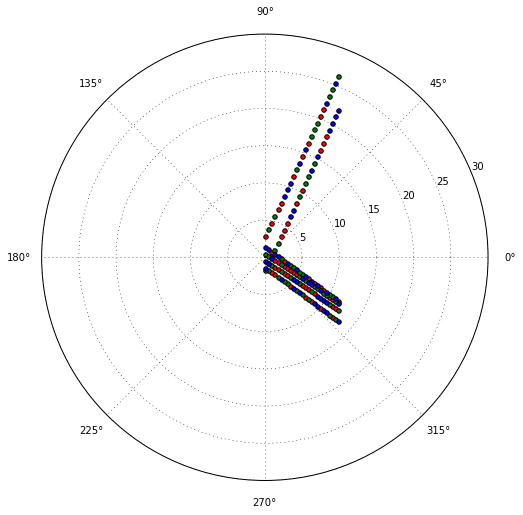

In [94]:
ax = plt.subplot(111, polar=True)

theta = np.arctan(X[:,1]/X[:,0])
r = np.sqrt(np.square(X[:,0]) + np.square(X[:,1]))



for label in labels:
    mask = (track == label)
    plt.scatter(theta[mask], r[mask], c=label)


        

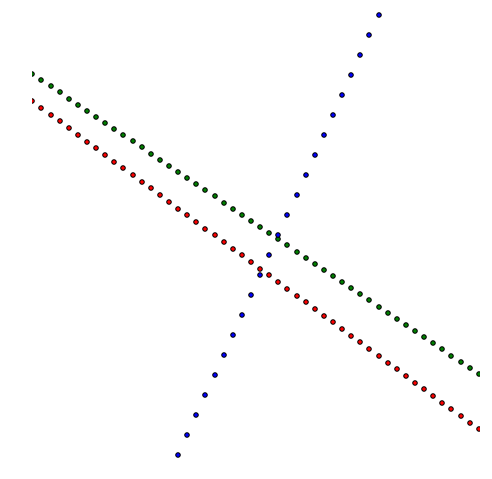

In [88]:
# Printing our tracks to check...
for label in labels:
    mask = (track == label)
    plt.scatter(hits[mask, 0], hits[mask, 1], c=label)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.axis('off')
plt.savefig("lines.png")
plt.show()


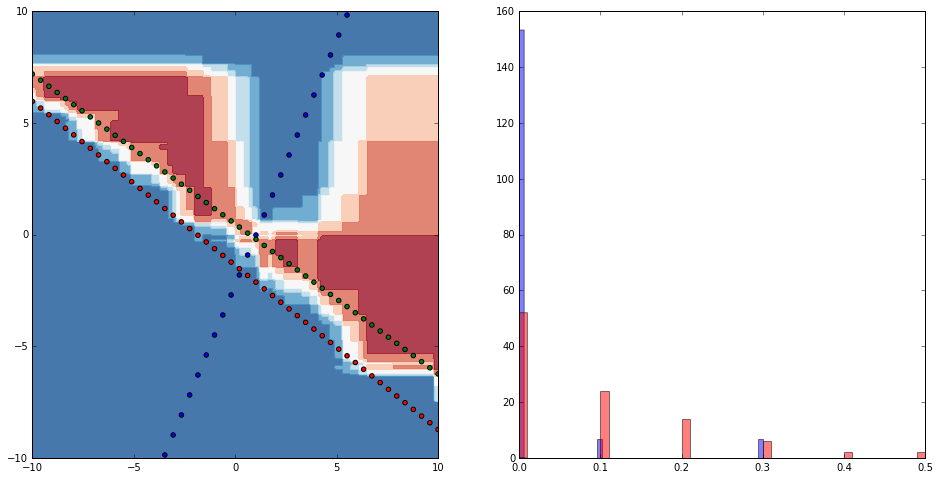

In [81]:
from sklearn.ensemble import BaggingClassifier 
from tutorial import plot_clf
clf = BaggingClassifier()
clf.fit(X, y)
plot_clf(clf, X, y)

